<a href="https://colab.research.google.com/github/woncoh1/era1a9/blob/main/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
- Data
    - Dataset: CIFAR-10
    - Data augmentation: Albumentations
- Model
    - Model architecture: CNN
    - Loss function: Cross entropy
- Optimization
    - Optimization algorithm: SGD
    - LR scheduler: One-cycle policy

## Targets
- Test accuracy > 85.0 %
- Number of parameters < 200,000
- Number of epochs: unlimited

## Results
- Best train accuracy = 81.40 %
- Best test accuracy = 87.04 %
- Number of parameters = 163,744
- Number of epochs = 30

In [1]:
!git clone https://github.com/woncoh1/era1a9.git

Cloning into 'era1a9'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 46 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), 17.81 KiB | 1.62 MiB/s, done.


In [2]:
%pip install albumentations -Uqq
%pip install torchinfo -Uqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 8.7 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchinfo import summary

from era1a9.src import data, engine, models, utils

# Device

## Colab runtime
- Hardware accelerator: GPU
- GPU type: T4
- Runtime shape: Standard

## Pytorch device
- cpu
- cuda
- mps

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Data
- Transforms
- Batch size

In [5]:
params_dataloader = {
    'batch_size': 128,
    'shuffle': True,
    'num_workers': 0,
    'pin_memory': True,
}

In [6]:
transform = data.get_transform()
dataset = data.get_dataset(transform)
loader = data.get_dataloader(dataset, params_dataloader)

100%|██████████| 170498071/170498071 [00:13<00:00, 12580283.02it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data


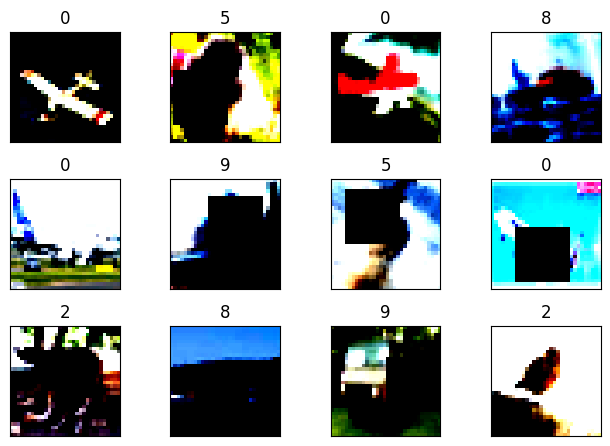

In [7]:
utils.plot_batch_samples(loader['train'])

# Model

In [8]:
params_model = {
    'dropout_prob': 0., # [0, 1]
    'padding_mode': 'replicate', # ['zeros', 'reflect', 'replicate', 'circular']
}

criterion = F.nll_loss
model = (
    models
    .Net(
        drop=params_model['dropout_prob'],
        padm=params_model['padding_mode'],
    )
    .to(device)
)

summary(
    model,
    input_size=(params_dataloader['batch_size'], *data.CHW),
    row_settings=['var_names'],
)

Layer (type (var_name))                  Output Shape              Param #
Net (Net)                                [128, 10]                 --
├─Sequential (conv0)                     [128, 16, 32, 32]         --
│    └─Conv2d (0)                        [128, 16, 32, 32]         432
│    └─BatchNorm2d (1)                   [128, 16, 32, 32]         32
│    └─Dropout2d (2)                     [128, 16, 32, 32]         --
│    └─ReLU (3)                          [128, 16, 32, 32]         --
├─SkipBlock (conv1)                      [128, 32, 32, 32]         --
│    └─Sequential (conv1)                [128, 16, 32, 32]         --
│    │    └─Conv2d (0)                   [128, 16, 32, 32]         2,304
│    │    └─BatchNorm2d (1)              [128, 16, 32, 32]         32
│    │    └─Dropout2d (2)                [128, 16, 32, 32]         --
│    │    └─ReLU (3)                     [128, 16, 32, 32]         --
│    └─Sequential (conv2)                [128, 32, 32, 32]         --
│    │    └

# Training
- Weight optimizer
- Learning-rate scheduler

In [9]:
params_trainer = {
    'num_epochs': 30,
}
params_optimizer = {
    'lr': 0.5,
    'momentum': 0.9,
}
params_scheduler = {
    'max_lr': params_optimizer['lr'],
    'epochs': params_trainer['num_epochs'],
    'steps_per_epoch': len(loader['train']), # 1 batch per step
}

optimizer = optim.SGD(model.parameters(), **params_optimizer)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, **params_scheduler)

results = engine.train(
    device,
    loader['train'],
    loader['test'],
    model,
    criterion,
    optimizer,
    scheduler,
    params_trainer['num_epochs'],
)

  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.01350, Accuracy = 35.72%, Epoch = 1
Test : Loss = 0.01174, Accuracy = 45.37%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.01150, Accuracy = 46.42%, Epoch = 2
Test : Loss = 0.01023, Accuracy = 51.40%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.01044, Accuracy = 52.20%, Epoch = 3
Test : Loss = 0.01385, Accuracy = 48.17%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00973, Accuracy = 55.58%, Epoch = 4
Test : Loss = 0.00887, Accuracy = 61.17%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00921, Accuracy = 57.99%, Epoch = 5
Test : Loss = 0.00803, Accuracy = 64.68%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00873, Accuracy = 60.63%, Epoch = 6
Test : Loss = 0.01046, Accuracy = 56.59%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00829, Accuracy = 62.47%, Epoch = 7
Test : Loss = 0.00764, Accuracy = 67.90%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00792, Accuracy = 64.48%, Epoch = 8
Test : Loss = 0.00721, Accuracy = 69.30%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00762, Accuracy = 65.65%, Epoch = 9
Test : Loss = 0.00894, Accuracy = 60.94%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00738, Accuracy = 67.25%, Epoch = 10
Test : Loss = 0.00790, Accuracy = 66.51%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00712, Accuracy = 68.06%, Epoch = 11
Test : Loss = 0.00647, Accuracy = 73.85%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00686, Accuracy = 69.37%, Epoch = 12
Test : Loss = 0.00753, Accuracy = 68.70%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00669, Accuracy = 70.09%, Epoch = 13
Test : Loss = 0.00636, Accuracy = 73.25%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00655, Accuracy = 70.74%, Epoch = 14
Test : Loss = 0.00623, Accuracy = 73.89%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00633, Accuracy = 71.67%, Epoch = 15
Test : Loss = 0.00585, Accuracy = 75.73%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00619, Accuracy = 72.29%, Epoch = 16
Test : Loss = 0.00528, Accuracy = 77.83%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00606, Accuracy = 72.90%, Epoch = 17
Test : Loss = 0.00698, Accuracy = 72.92%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00589, Accuracy = 73.82%, Epoch = 18
Test : Loss = 0.00472, Accuracy = 79.30%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00574, Accuracy = 74.43%, Epoch = 19
Test : Loss = 0.00452, Accuracy = 81.06%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00557, Accuracy = 75.14%, Epoch = 20
Test : Loss = 0.00453, Accuracy = 81.34%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00542, Accuracy = 75.88%, Epoch = 21
Test : Loss = 0.00452, Accuracy = 80.78%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00530, Accuracy = 76.44%, Epoch = 22
Test : Loss = 0.00446, Accuracy = 81.28%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00511, Accuracy = 77.25%, Epoch = 23
Test : Loss = 0.00443, Accuracy = 82.20%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00498, Accuracy = 77.85%, Epoch = 24
Test : Loss = 0.00371, Accuracy = 84.43%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00481, Accuracy = 78.45%, Epoch = 25
Test : Loss = 0.00369, Accuracy = 84.55%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00463, Accuracy = 79.50%, Epoch = 26
Test : Loss = 0.00337, Accuracy = 85.45%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00444, Accuracy = 80.27%, Epoch = 27
Test : Loss = 0.00334, Accuracy = 86.01%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00432, Accuracy = 80.64%, Epoch = 28
Test : Loss = 0.00315, Accuracy = 86.50%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00420, Accuracy = 81.35%, Epoch = 29
Test : Loss = 0.00314, Accuracy = 86.83%



  0%|          | 0/391 [00:00<?, ?it/s]

Train: Loss = 0.00418, Accuracy = 81.40%, Epoch = 30
Test : Loss = 0.00309, Accuracy = 87.04%



# Evaluation

## Learning rates
Find the optimal `max_lr` for the one cycle policy:
- https://sgugger.github.io/the-1cycle-policy.html
- https://iconof.com/1cycle-learning-rate-policy

In [10]:
trn = data.get_dataloader(dataset, params_dataloader)['train']
net = (
    models
    .Net(
        drop=params_model['dropout_prob'],
        padm=params_model['padding_mode'],
    )
    .to(device)
)
opt = optim.SGD(net.parameters(), **params_optimizer)
lrs, losses = utils.find_learning_rates(device, trn, net, criterion, opt)

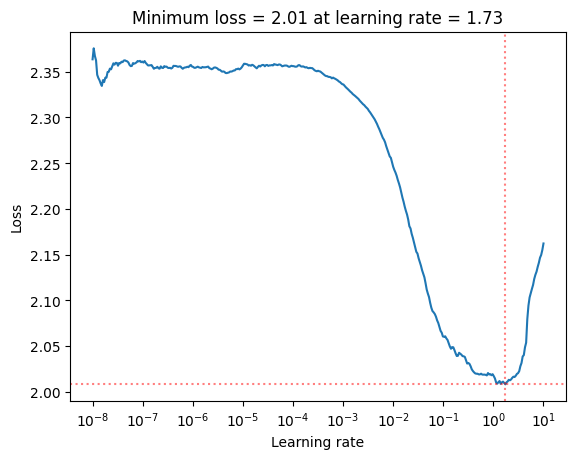

In [11]:
utils.plot_learning_rates(lrs, losses)

## Learning curves

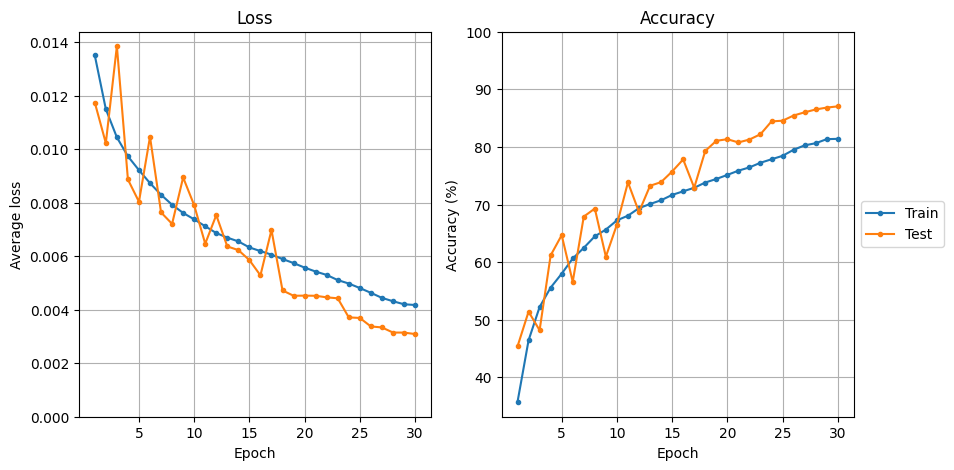

In [12]:
utils.plot_learning_curves(results, params_trainer['num_epochs'])

## Incorrect predictions

In [13]:
incorrects = utils.get_incorrect_predictions(
    device,
    data.get_dataloader(dataset, params_dataloader)['test'],
    model,
    criterion
)

Total Incorrect Predictions 1296


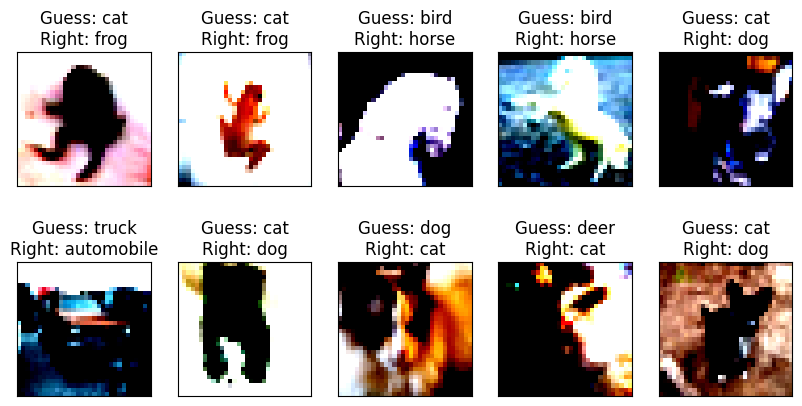

In [14]:
utils.plot_incorrect_predictions(incorrects, data.CLASSES)